In [86]:
import os

In [87]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [8]:
# Keep just the file with the year 1908_
bxl_files = [f for f in files if f.startswith('Bxl_1908')]
len(bxl_files)

16

In [9]:
this_file = bxl_files[0]
this_file

'Bxl_1908_Tome_I1_Part_1.txt'

In [10]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

'V I L L E\n\nDE\n\nB R U X E L L E S .\no\n\nB U L L E T I N COMMUNAL\nA N N É E\n\nPREMIÈRE\n\nTOME\n\nC O M P T E\n\nR E N D U\n\n1908.\n\nPARTIE.\n\nI.\n\nD E S\n\nS É A N C E S .\n\nBRUXELLES\nTYPOGRAPHIE\n\nET LITHOGRAPHIE\nRue P a c h é c o ,\n12\n\n1908\n\nE . GUYOT\n\n\x0c\x0cN° 1.\n\nC O M P T E R E N D U D E L A SÉANCE D U 2 J A N V I E R 1 9 0 8 .\n\nVILLE D E BRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\nAnnée 1 9 0 8\n\nCONSEIL\nSéance\n\nCOMMUNAL.\n\ndu 2 Janvier 1 9 0 8 .\n\nPrésidence de M . E M I L E D E M O T , Bourgmestre.\n.SOMMAIRE :\n1.\n\nPrestatio'

# WordsCloud

### Imports

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rue", "conseil", "college", "collège", 
       "francs", "bruxelles", "art", "bourgmestre", "frais", "communal", "heures", "leurs",
       "saint", "messieurs", "etc", "ceux", "celui"]
sw = set(sw)

### Créer un fichier contenant le texte de tous les bulletins de l'année 1908

In [3]:
# Choisir une année
year = 1908

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
# Ici en fois de faire un loop, c'est possible de faire une liste 
# year is String dans le txt (I think everithing is string)
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1908_Tome_I1_Part_1.txt',
 'Bxl_1908_Tome_I1_Part_10.txt',
 'Bxl_1908_Tome_I1_Part_11.txt',
 'Bxl_1908_Tome_I1_Part_12.txt',
 'Bxl_1908_Tome_I1_Part_13.txt',
 'Bxl_1908_Tome_I1_Part_2.txt',
 'Bxl_1908_Tome_I1_Part_3.txt',
 'Bxl_1908_Tome_I1_Part_4.txt',
 'Bxl_1908_Tome_I1_Part_5.txt',
 'Bxl_1908_Tome_I1_Part_6.txt',
 'Bxl_1908_Tome_I1_Part_7.txt',
 'Bxl_1908_Tome_I1_Part_8.txt',
 'Bxl_1908_Tome_I1_Part_9.txt',
 'Bxl_1908_Tome_II1_Part_1.txt',
 'Bxl_1908_Tome_II1_Part_2.txt',
 'Bxl_1908_Tome_II1_Part_3.txt']

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

16

In [7]:
# Imprimer les 300 premiers caractères du contenu du premier fichier
content_list[0][:300]

'V I L L E\n\nDE\n\nB R U X E L L E S .\no\n\nB U L L E T I N COMMUNAL\nA N N É E\n\nPREMIÈRE\n\nTOME\n\nC O M P T E\n\nR E N D U\n\n1908.\n\nPARTIE.\n\nI.\n\nD E S\n\nS É A N C E S .\n\nBRUXELLES\nTYPOGRAPHIE\n\nET LITHOGRAPHIE\nRue P a c h é c o ,\n12\n\n1908\n\nE . GUYOT\n\n\x0c\x0cN° 1.\n\nC O M P T E R E N D U D E L A SÉANCE D U 2 J A N V I '

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'V I L L E\n\nDE\n\nB R U X E L L E S .\no\n\nB U L L E T I N COMMUNAL\nA N N É E\n\nPREMIÈRE\n\nTOME\n\nC O M P T E\n\nR E N D U\n\n1908.\n\nPARTIE.\n\nI.\n\nD E S\n\nS É A N C E S .\n\nBRUXELLES\nTYPOGRAPHIE\n\nET LITHOGRAPHIE\nRue P a c h é c o ,\n12\n\n1908\n\nE . GUYOT\n\n\x0c\x0cN° 1.\n\nC O M P T E R E N D U D E L A SÉANCE D U 2 J A N V I E R 1 9 0 8 .\n\nVILLE D E BRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\nAnnée 1 9 0 8\n\nCONSEIL\nSéance\n\nCOMMUNAL.\n\ndu 2 Janvier 1 9 0 8 .\n\nPrésidence de M . E M I L E D E M O T , Bourgmestre.\n.SOMMAIRE :\n1.\n\nPrestatio'

### Nettoyer le fichier à l'aide d'une fonction de nettoyage

#### Créer la fonction de nettoyage

In [10]:
# Define la fonction clean_text, cherche le contenu du fichier et fait le nettoyage
# Takes de folder content
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        # El interés es que WordCloud funciona con 1 string y no con una lista
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année 1908

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1908_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'première tome partie typographie lithographie guyot séance bulletin année séance janvier présidence sommaire prestation serment installation conseillers élus octobre moons conseiller suppléant communication election quatre échevins composition sections année renvoi comité secret personnel administration communale délégation donnée nomination divers emplois séance ouverte quinze minutes mot lepage echevin lemonnier grimard steens max vandendorne furnemont crick brabandt wauwermans pnttou delbasté'

## WordCloud

### Afficher les termes les plus fréquents

In [13]:
# Counter hace un diccionario que tiene como key la palabra y como valor la cantidad de veces que aparece la palabra
# Directamente buscando con la key, acceso a los datos de ese registro porque está indexada
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('service', 751), ('place', 613), ('budget', 613), ('dépenses', 592), ('avis', 590), ('section', 588), ('hospices', 556), ('travaux', 549), ('charges', 540), ('cahier', 482)]


### Créer, stocker et afficher le nuage de mots

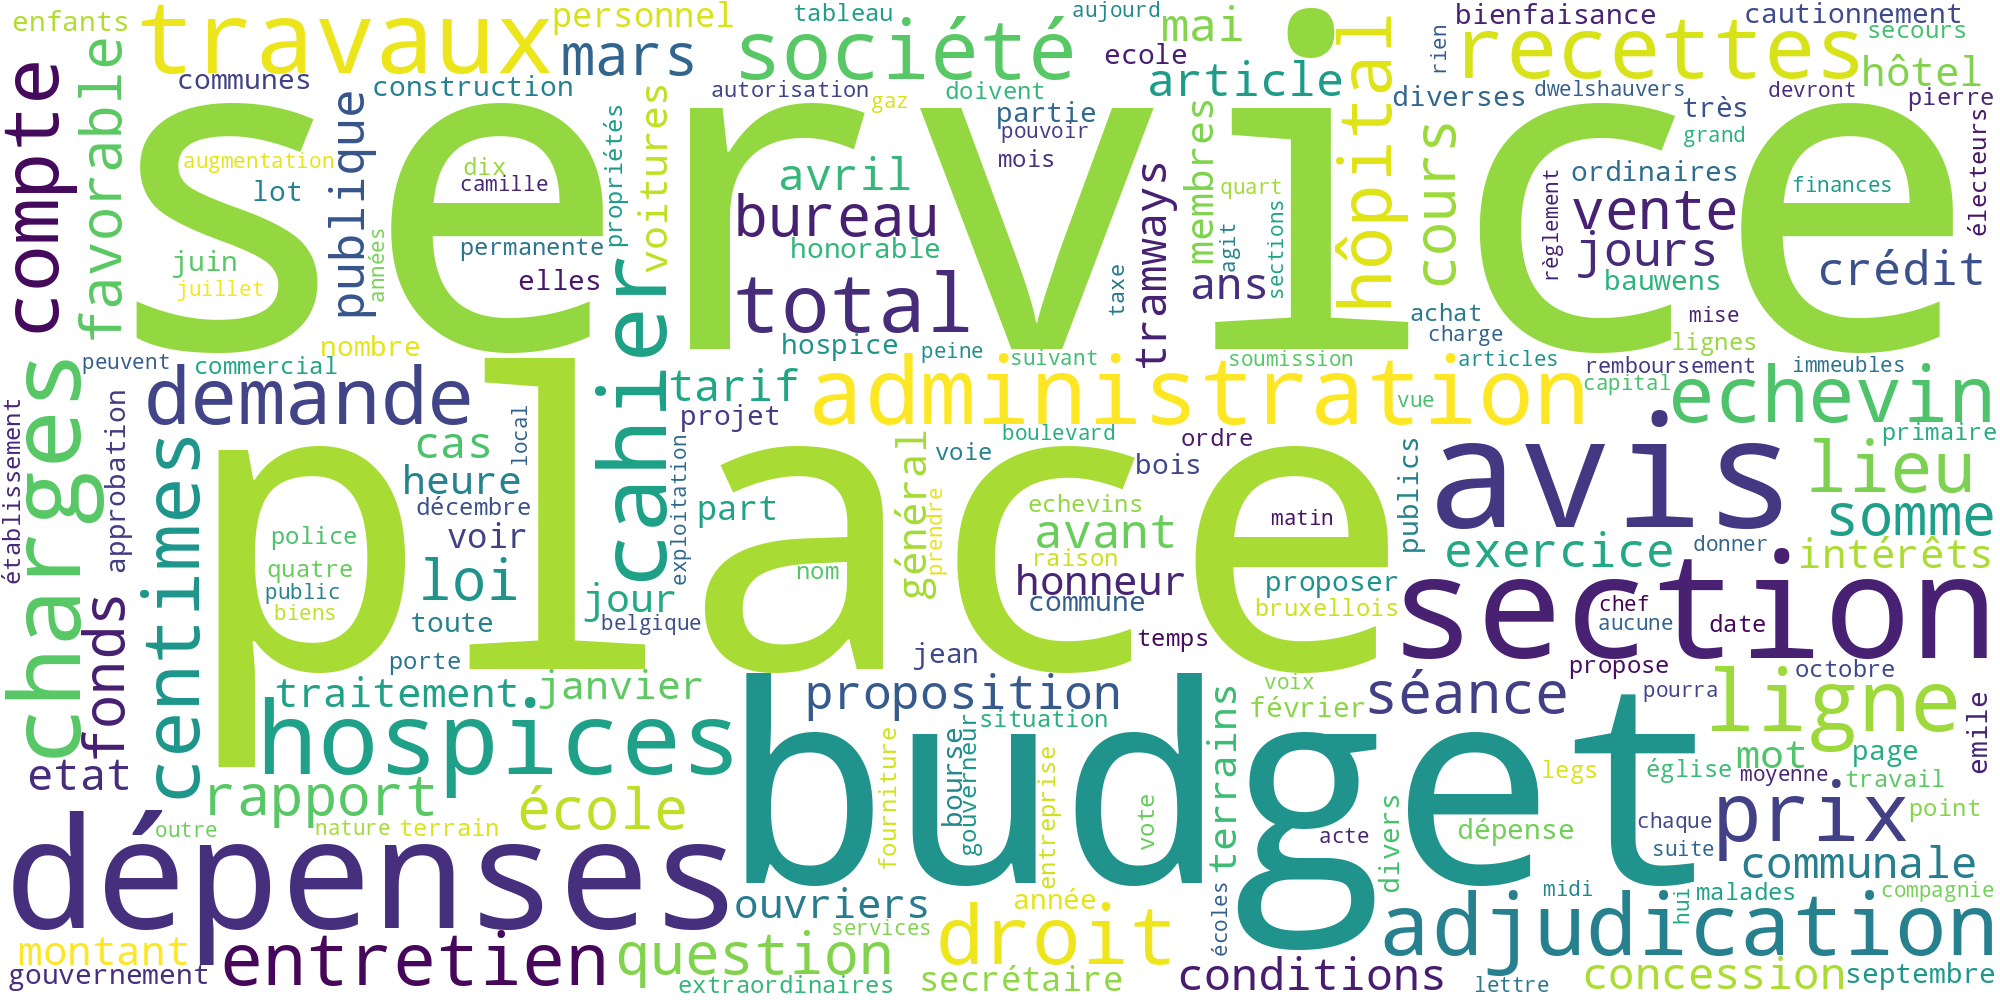

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

In [2]:
from collections import defaultdict
# modelos NLP recontra desarillados
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [3]:
nlp = spacy.load('fr_core_news_md')

In [4]:
import os

In [5]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [6]:
bxl_files_1908 = [f for f in files if f.startswith('Bxl_1908')]

In [13]:
# Choisir un fichier
# this_file = bxl_files_1908[0]
# this_file

text = ''

for this_file in bxl_files_1908:
    text += open(os.path.join(data_path, this_file), encoding='utf-8').read()

print(text[:50000])


V I L L E

DE

B R U X E L L E S .
o

B U L L E T I N COMMUNAL
A N N É E

PREMIÈRE

TOME

C O M P T E

R E N D U

1908.

PARTIE.

I.

D E S

S É A N C E S .

BRUXELLES
TYPOGRAPHIE

ET LITHOGRAPHIE
Rue P a c h é c o ,
12

1908

E . GUYOT

N° 1.

C O M P T E R E N D U D E L A SÉANCE D U 2 J A N V I E R 1 9 0 8 .

VILLE D E BRUXELLES

BULLETIN

COMMUNAL

Année 1 9 0 8

CONSEIL
Séance

COMMUNAL.

du 2 Janvier 1 9 0 8 .

Présidence de M . E M I L E D E M O T , Bourgmestre.
.SOMMAIRE :
1.

Prestation de serment et installation des Conseillers élus
le 20 octobre 1907, et de M . Moons, Conseiller suppléant
1A. Communication.
2. Election de quatre Échevins
3. Composition des Sections pour l'année 1908, — Renvoi au
Comité secret
é
Personnel de l'Administration communale. — Délégation
donnée au Collège pour la nomination à divers emplois

4
5
5
8-10
8

La séance est ouverte à deux heures quinze minutes.

P r é s e n t s : M M . De Mot, Bourgmestre;
Lepage, Echevin;
Lemonnier, Grimard, Steens, M

In [120]:
# Récupérer le texte du fichier
# n=9000
# text = open(os.path.join(data_path, this_file), encoding='utf-8').read()[:n]

In [8]:
%%time
# Traiter le texte

doc = nlp(text[:100000])

CPU times: user 1.5 s, sys: 84.5 ms, total: 1.59 s
Wall time: 1.69 s


In [9]:
people = defaultdict(int)
for ent in doc.ents:
    # Acá se puede reemplzar "PER" por "LOC"por ejemplo para testear con otras entidades
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [10]:
# Trier et imprimer
# Acá lo interesante sería mostrar la evolución de los nombres de familia 
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Bourgmestre apparait 13 fois dans le corpus
Echevin apparait 13 fois dans le corpus
Grimard apparait 8 fois dans le corpus
Lemonnier apparait 6 fois dans le corpus
Steens apparait 4 fois dans le corpus
Burthoul apparait 4 fois dans le corpus
De Page apparait 4 fois dans le corpus
Jacqmain apparait 4 fois dans le corpus
Scrutin apparait 4 fois dans le corpus
Lepage apparait 3 fois dans le corpus
Hanssens apparait 3 fois dans le corpus
Anspach-Puissant apparait 3 fois dans le corpus
Camille Huysmans apparait 3 fois dans le corpus
Messieurs apparait 3 fois dans le corpus
Conseiller apparait 2 fois dans le corpus
Crick apparait 2 fois dans le corpus
Hubert apparait 2 fois dans le corpus
Bauwens apparait 2 fois dans le corpus
Desmet apparait 2 fois dans le corpus
Vanneck apparait 2 fois dans le corpus
Huisman apparait 2 fois dans le corpus
Delbastée apparait 2 fois dans le corpus
Jules de Trooz apparait 2 fois dans le corpus
Echevins apparait 2 fois dans le corpus
Monsieur le Bourgmestre ap

In [11]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [12]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

#blob encasilla una palabra en positiva, negativa o neutra

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [14]:
# 1
get_sentiment("M . De Locht s'excuse de ne pouvoir assister à la séance.")

This text is neutral and perfectly objective.


In [15]:
# 2
get_sentiment("Mais la statistique de la mortalité est aisée ; celle de la morbidité l'est moins.")

This text is neutral and perfectly objective.


In [16]:
# 3
get_sentiment("Il est procédé au vote par scrutin secret.")

This text is 8% positive and 40% subjective.


In [17]:
# 3
get_sentiment("je souhaite à mes collègues une cordiale bienvenue et je fais appel à leur concours à tons pour le plus grand bien de notre c h è r e c i t é")

This text is 21% positive and 32% subjective.


In [19]:
# 4
get_sentiment("L'existence d'une épidémie ne peut être constatée que par les cas qui se présentent parmi les assistés de la bienfaisance publique (les médecins ont l'obligation de les déclarer) ou bien par les malades traités dans les hôpitaux.")

This text is 12% negative and 20% subjective.


In [20]:
# 5
get_sentiment("Je trouve fantastique que l'on puisse autoriser une personne, par camaraderie, par tolérance, ou pour toute autre raison, à cacher la cause d'un décès.")

This text is 37% positive and 37% subjective.


In [21]:
# 6
get_sentiment("L'Union syndicale des hôteliers, restaurateurs et cafetiers de l'agglomération bruxelloise demande le rétablissement au budget de 1908 du crédit accordé pour les courses de chevaux.")

This text is neutral and perfectly objective.


In [22]:
# 7
get_sentiment("Nous sommes heureux de vous revoir parmi nous et nous comptons tous sur votre précieux concours.")

This text is 51% positive and 50% subjective.


In [23]:
# 8
get_sentiment("L'eau de la distribution de Bruxelles, à l'heure actuelle, peut être classée comme auparavant parmi les meilleures eaux de distribution")

This text is 32% positive and 30% subjective.


In [24]:
# 9
get_sentiment("L a Société des Brasseurs de l'arrondissemantde Bruxelles se plaint de la difficulté que présentent, pour les conducteurs de véhicules")

This text is neutral and perfectly objective.


In [18]:
# 10
get_sentiment("C'est le cas de dire que si nos eaux étaient contaminées, et n'avaient pas les qualités que tout le monde leur reconnaît, nos hôpitaux ne pourraient suffire, et Bruxelles serait le siège permanent d'épidémies redoutables.")

This text is 2% negative and 30% subjective.
